In [23]:
import matplotlib.pyplot as plt
import random
import copy
import tqdm
from itertools import combinations

In [24]:
class Hetman():
  """Klasa definiujaca problem"""
  def __init__(self, n:int): 
    if n < 4:
      raise ValueError("The size must equal or greater than 4!")
    self.n = n 
    self.permutation = list(range(n))
    random.shuffle(self.permutation)


  def apply_change(self, action):
    "Stan, który jest rezultatem wykonania akcji `action` na stanie `state`."
    row, new_row = action
    self.permutation[row], self.permutation[new_row] = self.permutation[new_row], self.permutation[row]

  def mutate(self):
    action = (random.randint(0, self.n - 1), random.randint(0, self.n - 1))
    self.apply_change(action)

  def goal_function(self):
      all_combinations = combinations(zip(range(self.n), self.permutation), 2)
      return sum([Hetman._is_hit(hetman_1, hetman_2) for hetman_1, hetman_2 in all_combinations])

  @staticmethod
  def _is_hit( hetman_1:tuple, hetman_2:tuple):
    if hetman_1[0] == hetman_2[0]:
      #same row
      #print(hetman_1, hetman_2)
      return True
    if hetman_1[1] == hetman_2[1]:
      #same column
      #print(hetman_1, hetman_2)
      return True
    if abs(hetman_1[0] - hetman_2[0]) == abs(hetman_1[1] - hetman_2[1]):
      #diagonal
      #print(hetman_1, hetman_2)
      return True
    #passed all checks
    return False

  def permutation_to_board(self):
      state = [[0 for i in range(self.n)] for i in range(self.n)]
      for row, col in zip(range(len(self.permutation)), self.permutation):
          state[row][col] = 1
      return state


In [25]:
def visualize_table(state):
  plt.matshow(state, cmap="Greys")
  plt.grid()
  plt.show()

#Testy wizualizacji

In [26]:
my_problem = Hetman(8)

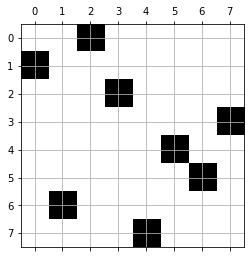

In [27]:
visualize_table(my_problem.permutation_to_board())

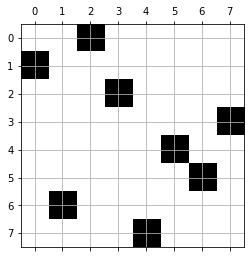

In [28]:
#one  neighbour
my_problem.mutate()
visualize_table(my_problem.permutation_to_board())

In [29]:
my_problem.goal_function()

4

#Populacja

In [30]:
class Population():
  def __init__(self, size:int, problem_size=8):
    self.problem_size = problem_size
    self.size = size
    self.members = [Hetman(problem_size) for _ in range(size)]
    self.goal = [member.goal_function() for member in self.members]

  def sort(self):
    self.goal = [member.goal_function() for member in self.members]
    zipped_sorted = sorted(zip(self.members, self.goal), key=lambda pair: pair[1], reverse=True)
    self.members = [pair[0] for pair in zipped_sorted]

  def get_best(self):
    self.sort()
    return self.members[-1]

  def get_mean_goal(self):
    return sum(self.goal) / self.size

Solution's goal function 3
Populations's mean goal function 5.34


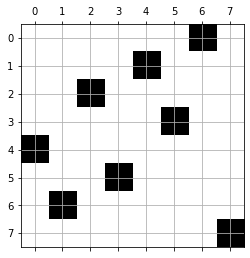

In [31]:
my_population = Population(50, 8)
best_solution = my_population.get_best()
goal = best_solution.goal_function()
mean_goal = my_population.get_mean_goal()

#visualize solution
# print(f"Solution found within {steps} steps.")
print(f"Solution's goal function {goal}")
print(f"Populations's mean goal function {mean_goal}")
visualize_table(best_solution.permutation_to_board())

In [32]:
class GA:
  def __init__(self, population:Population, prawdopodobienstwo_mutacji:float, liczba_generacji: int):
    """prawdopodobieństwo mutacji zakres większe od 0,3 mniejsze od 0,8 
    liczba generacji zakres od 100 do 10000"""
    self.population = population
    self.mutation_rate = prawdopodobienstwo_mutacji
    self.n_generations = liczba_generacji
    self.max_roulette = int((population.size * (population.size + 1))/2)


  def solve(self):
    mean_goals = [self.population.get_mean_goal()]
    best_goals = [self.population.get_best().goal_function()]

    for _ in tqdm.tqdm((range(self.n_generations))):
      #Algorithm
      #stop condition
      if best_goals[-1] == 0:
        break

      self.population.members = self.select_new_population_members()

      for i in range(self.population.size):
        #by probability - stochastic elelmet
        if random.random() < self.mutation_rate:
          self.population.members[i].mutate()


      mean_goals.append(self.population.get_mean_goal())
      best_goals.append(self.population.get_best().goal_function())

    return mean_goals, best_goals

  def select_new_population_members(self):
    new_members = []
    for _ in range(self.population.size):
      #random number in range 0 to self.max_roulette
      number = random.random()*self.max_roulette
      index = self.roulette(number)
      new_members.append(copy.deepcopy(self.population.members[index]))
    return self.population.members

  def roulette(self, number):
    """ Return index of a member selected by the roulette"""
    for i in range(self.max_roulette):
      number -= (i + 1)
      if number < 0: 
        return i


 42%|████▏     | 419/1000 [00:01<00:01, 316.91it/s]


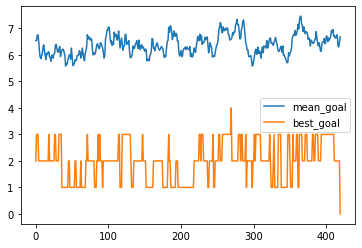

Solution's goal function 0
Populations's mean goal function 6.54


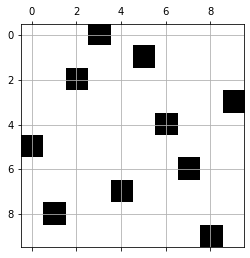

In [33]:
liczba_generacji =1000
prawdopodobienstwo_mutacji = 0.3
wielkosc_szachownicy = 10
liczba_osobnikow = 50


my_population = Population(liczba_osobnikow, wielkosc_szachownicy)

ga = GA(my_population, prawdopodobienstwo_mutacji = prawdopodobienstwo_mutacji, liczba_generacji= liczba_generacji)
mean_goals, best_goals = ga.solve()


#wykresy dla zmian w statystykach
plt.plot(range(len(mean_goals)), mean_goals, label="mean_goal")
plt.plot(range(len(best_goals)), best_goals, label="best_goal")
plt.legend()
plt.show()


best_solution = my_population.get_best()
goal = best_solution.goal_function()
mean_goal = my_population.get_mean_goal()

#visualize solution
# print(f"Solution found within {steps} steps.")
print(f"Solution's goal function {goal}")
print(f"Populations's mean goal function {mean_goal}")
visualize_table(best_solution.permutation_to_board())